In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from scipy.stats import wilcoxon

In [2]:
fly_selected_list = ['nsyb-G7f-rAch1h/20230417-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230428-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230507-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230515-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230429-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230506-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly4/data_motion',
                     'nsyb-G7f-r5HT1.0/20230517-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly3/data_motion',
                     'nsyb-G7f-r5HT1.0/20230603-nsyb-G7f-r5HT1.0/fly1/data_motion']

In [3]:
file_save_path = 'motion_analysis'
# motion data
motion_result_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new'
# neural data
neural_result_path = '../results'
filename_1_1 = 'odor_classification_accuracy_motion_explained_c1.npy'
filename_1_2 = 'odor_classification_accuracy_gt_c1.npy'
filename_1_3 = 'odor_classification_accuracy_motion_residual_c1.npy'
filename_2_1 = 'odor_classification_accuracy_motion_explained_c2.npy'
filename_2_2 = 'odor_classification_accuracy_gt_c2.npy'
filename_2_3 = 'odor_classification_accuracy_motion_residual_c2.npy'
the_color = ['#006934','#751C77','#036EB8']
if_save = False
the_save_path = os.path.join(neural_result_path,file_save_path,'7_regression_stim_classification')
folder = os.path.exists(the_save_path)
if not folder:
    os.makedirs(the_save_path)

In [4]:
# load data Ach
acc_list_c1_1 = []
acc_list_c1_2 = []
acc_list_ach_1 = []
acc_list_ach_2 = []
for i_fly in range(10):
    fly_selected = fly_selected_list[i_fly]
    data_1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1_1))
    data_2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1_2))
    data_3 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1_3))
    acc_list_c1_1.append(np.squeeze(data_1[:,-1]))
    acc_list_c1_2.append(np.squeeze(data_2[:,-1])-np.squeeze(data_3[:,-1]))
    data_1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2_1))
    data_2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2_2))
    data_3 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2_3))
    acc_list_ach_1.append(np.squeeze(data_1[:,-1]))
    acc_list_ach_2.append(np.squeeze(data_2[:,-1])-np.squeeze(data_3[:,-1]))
acc_list_c1_1 = np.array(acc_list_c1_1)
acc_list_c1_2 = np.array(acc_list_c1_2)
acc_list_ach_1 = np.array(acc_list_ach_1)
acc_list_ach_2 = np.array(acc_list_ach_2)

In [5]:
# load data 5ht
acc_list_c1_1_1 = []
acc_list_c1_2_1 = []
acc_list_5ht_1 = []
acc_list_5ht_2 = []
for i_fly in range(10,len(fly_selected_list)):
    fly_selected = fly_selected_list[i_fly]
    data_1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1_1))
    data_2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1_2))
    data_3 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1_3))
    acc_list_c1_1_1.append(np.squeeze(data_1[:,-1]))
    acc_list_c1_2_1.append(np.squeeze(data_2[:,-1])-np.squeeze(data_3[:,-1]))
    data_1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2_1))
    data_2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2_2))
    data_3 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2_3))
    acc_list_5ht_1.append(np.squeeze(data_1[:,-1]))
    acc_list_5ht_2.append(np.squeeze(data_2[:,-1])-np.squeeze(data_3[:,-1]))
acc_list_c1_1_1 = np.array(acc_list_c1_1_1)
acc_list_c1_2_1 = np.array(acc_list_c1_2_1)
acc_list_5ht_1 = np.array(acc_list_5ht_1)
acc_list_5ht_2 = np.array(acc_list_5ht_2)

In [6]:
acc_list_g7f_1 = np.concatenate((acc_list_c1_1,acc_list_c1_1_1),axis = 0)
acc_list_g7f_2 = np.concatenate((acc_list_c1_2,acc_list_c1_2_1),axis = 0)

[0.27638889 0.28861111]
 p:
0.3299827575683594


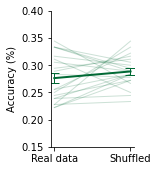

[0.31722222 0.29388889]
 p:
0.13829429092519505


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


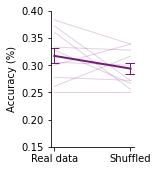

[0.255 0.295]
 p:
0.193359375


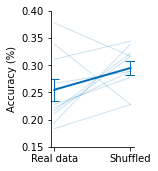

In [7]:
# plot - 1
for i in range(3):
    if i == 0:
        acc_list = acc_list_g7f_1
    elif i == 1:
        acc_list = acc_list_ach_1
    else:
        acc_list = acc_list_5ht_1
    num_fly = np.size(acc_list,0)
    the_mean = np.mean(acc_list,0)
    print(the_mean)
    the_std = np.std(acc_list,0)/math.sqrt(num_fly)
    plt.figure(figsize = (1.5,2.5))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for k in range(num_fly):
        plt.plot(acc_list[k,:],c = the_color[i],linewidth=1,alpha = 0.2)
    plt.errorbar(range(np.size(acc_list,1)),the_mean,yerr=the_std,ecolor=the_color[i],elinewidth=1,marker='.',mfc=the_color[i],
    mec=the_color[i],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=the_color[i], linewidth=2)
    plt.xticks([0,1],['Real data','Shuffled'])
    plt.ylabel('Accuracy (%)')
    plt.ylim((0.15,0.4))
    res = wilcoxon(acc_list[:,0],acc_list[:,1])
    p = res.pvalue
    print(' p:')
    print(p)
    ymax = np.max(acc_list)
    if p<0.05 and p>=0.01:
        plt.text(0.5,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.01 and p>0.001:
        plt.text(0.5,ymax,'**',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.001 and p>=0.0001:
        plt.text(0.5,ymax,'***',verticalalignment = 'center', horizontalalignment = 'center') 
    elif p<0.0001:
        plt.text(0.5,ymax,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path + '/' + 'acc_channel_'+str(i)+'_1.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path + '/' + 'acc_channel_'+str(i)+'_1.pdf',dpi = 300,bbox_inches = 'tight')
    plt.show()

[-0.00388889  0.01972222]
 p:
0.06372261047363281


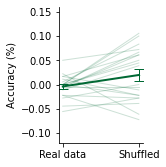

[0.         0.00444444]
 p:
0.9056129970352024


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


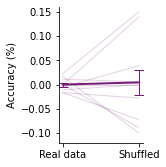

[-0.03277778 -0.00722222]
 p:
0.232421875


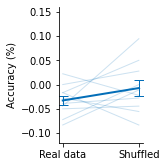

In [8]:
# plot - 2
for i in range(3):
    if i == 0:
        acc_list = acc_list_g7f_2
    elif i == 1:
        acc_list = acc_list_ach_2
    else:
        acc_list = acc_list_5ht_2
    num_fly = np.size(acc_list,0)
    the_mean = np.mean(acc_list,0)
    print(the_mean)
    the_std = np.std(acc_list,0)/math.sqrt(num_fly)
    plt.figure(figsize = (1.5,2.5))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for k in range(num_fly):
        plt.plot(acc_list[k,:],c = the_color[i],linewidth=1,alpha = 0.2)
    plt.errorbar(range(np.size(acc_list,1)),the_mean,yerr=the_std,ecolor=the_color[i],elinewidth=1,marker='.',mfc=the_color[i],
    mec=the_color[i],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=the_color[i], linewidth=2)
    plt.xticks([0,1],['Real data','Shuffled'])
    plt.ylabel('Accuracy (%)')
    plt.ylim((-0.12,0.16))
    res = wilcoxon(acc_list[:,0],acc_list[:,1])
    p = res.pvalue
    print(' p:')
    print(p)
    ymax = np.max(acc_list)
    if p<0.05 and p>=0.01:
        plt.text(0.5,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.01 and p>0.001:
        plt.text(0.5,ymax,'**',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.001 and p>=0.0001:
        plt.text(0.5,ymax,'***',verticalalignment = 'center', horizontalalignment = 'center') 
    elif p<0.0001:
        plt.text(0.5,ymax,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path + '/' + 'acc_channel_'+str(i)+'_2.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path + '/' + 'acc_channel_'+str(i)+'_2.pdf',dpi = 300,bbox_inches = 'tight')
    plt.show()